### Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("WineQT.csv")

In [35]:
import warnings
warnings.filterwarnings("ignore")

### Importing Dataset

In [36]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [39]:
df.shape

(1143, 13)

In [40]:
X.shape

(1143, 11)

### Data Visualization

Text(0.5, 1.0, 'Alcohol vs Wine quality')

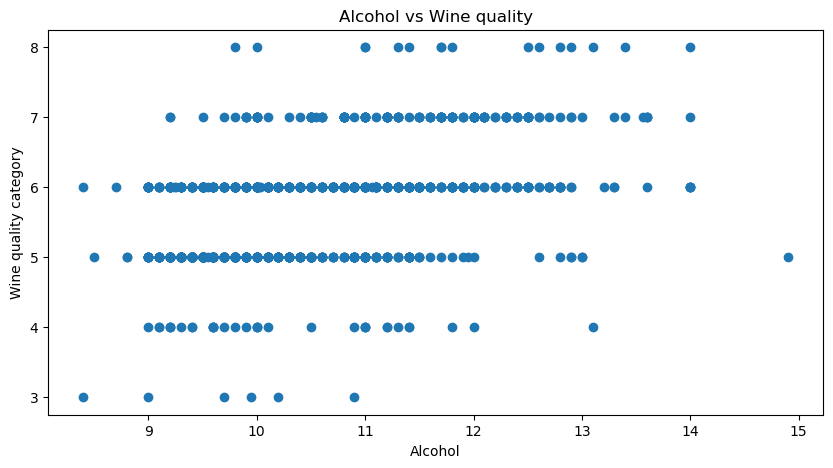

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df['alcohol'],df['quality'])
plt.ylabel("Wine quality category")
plt.xlabel("Alcohol")
plt.title("Alcohol vs Wine quality")

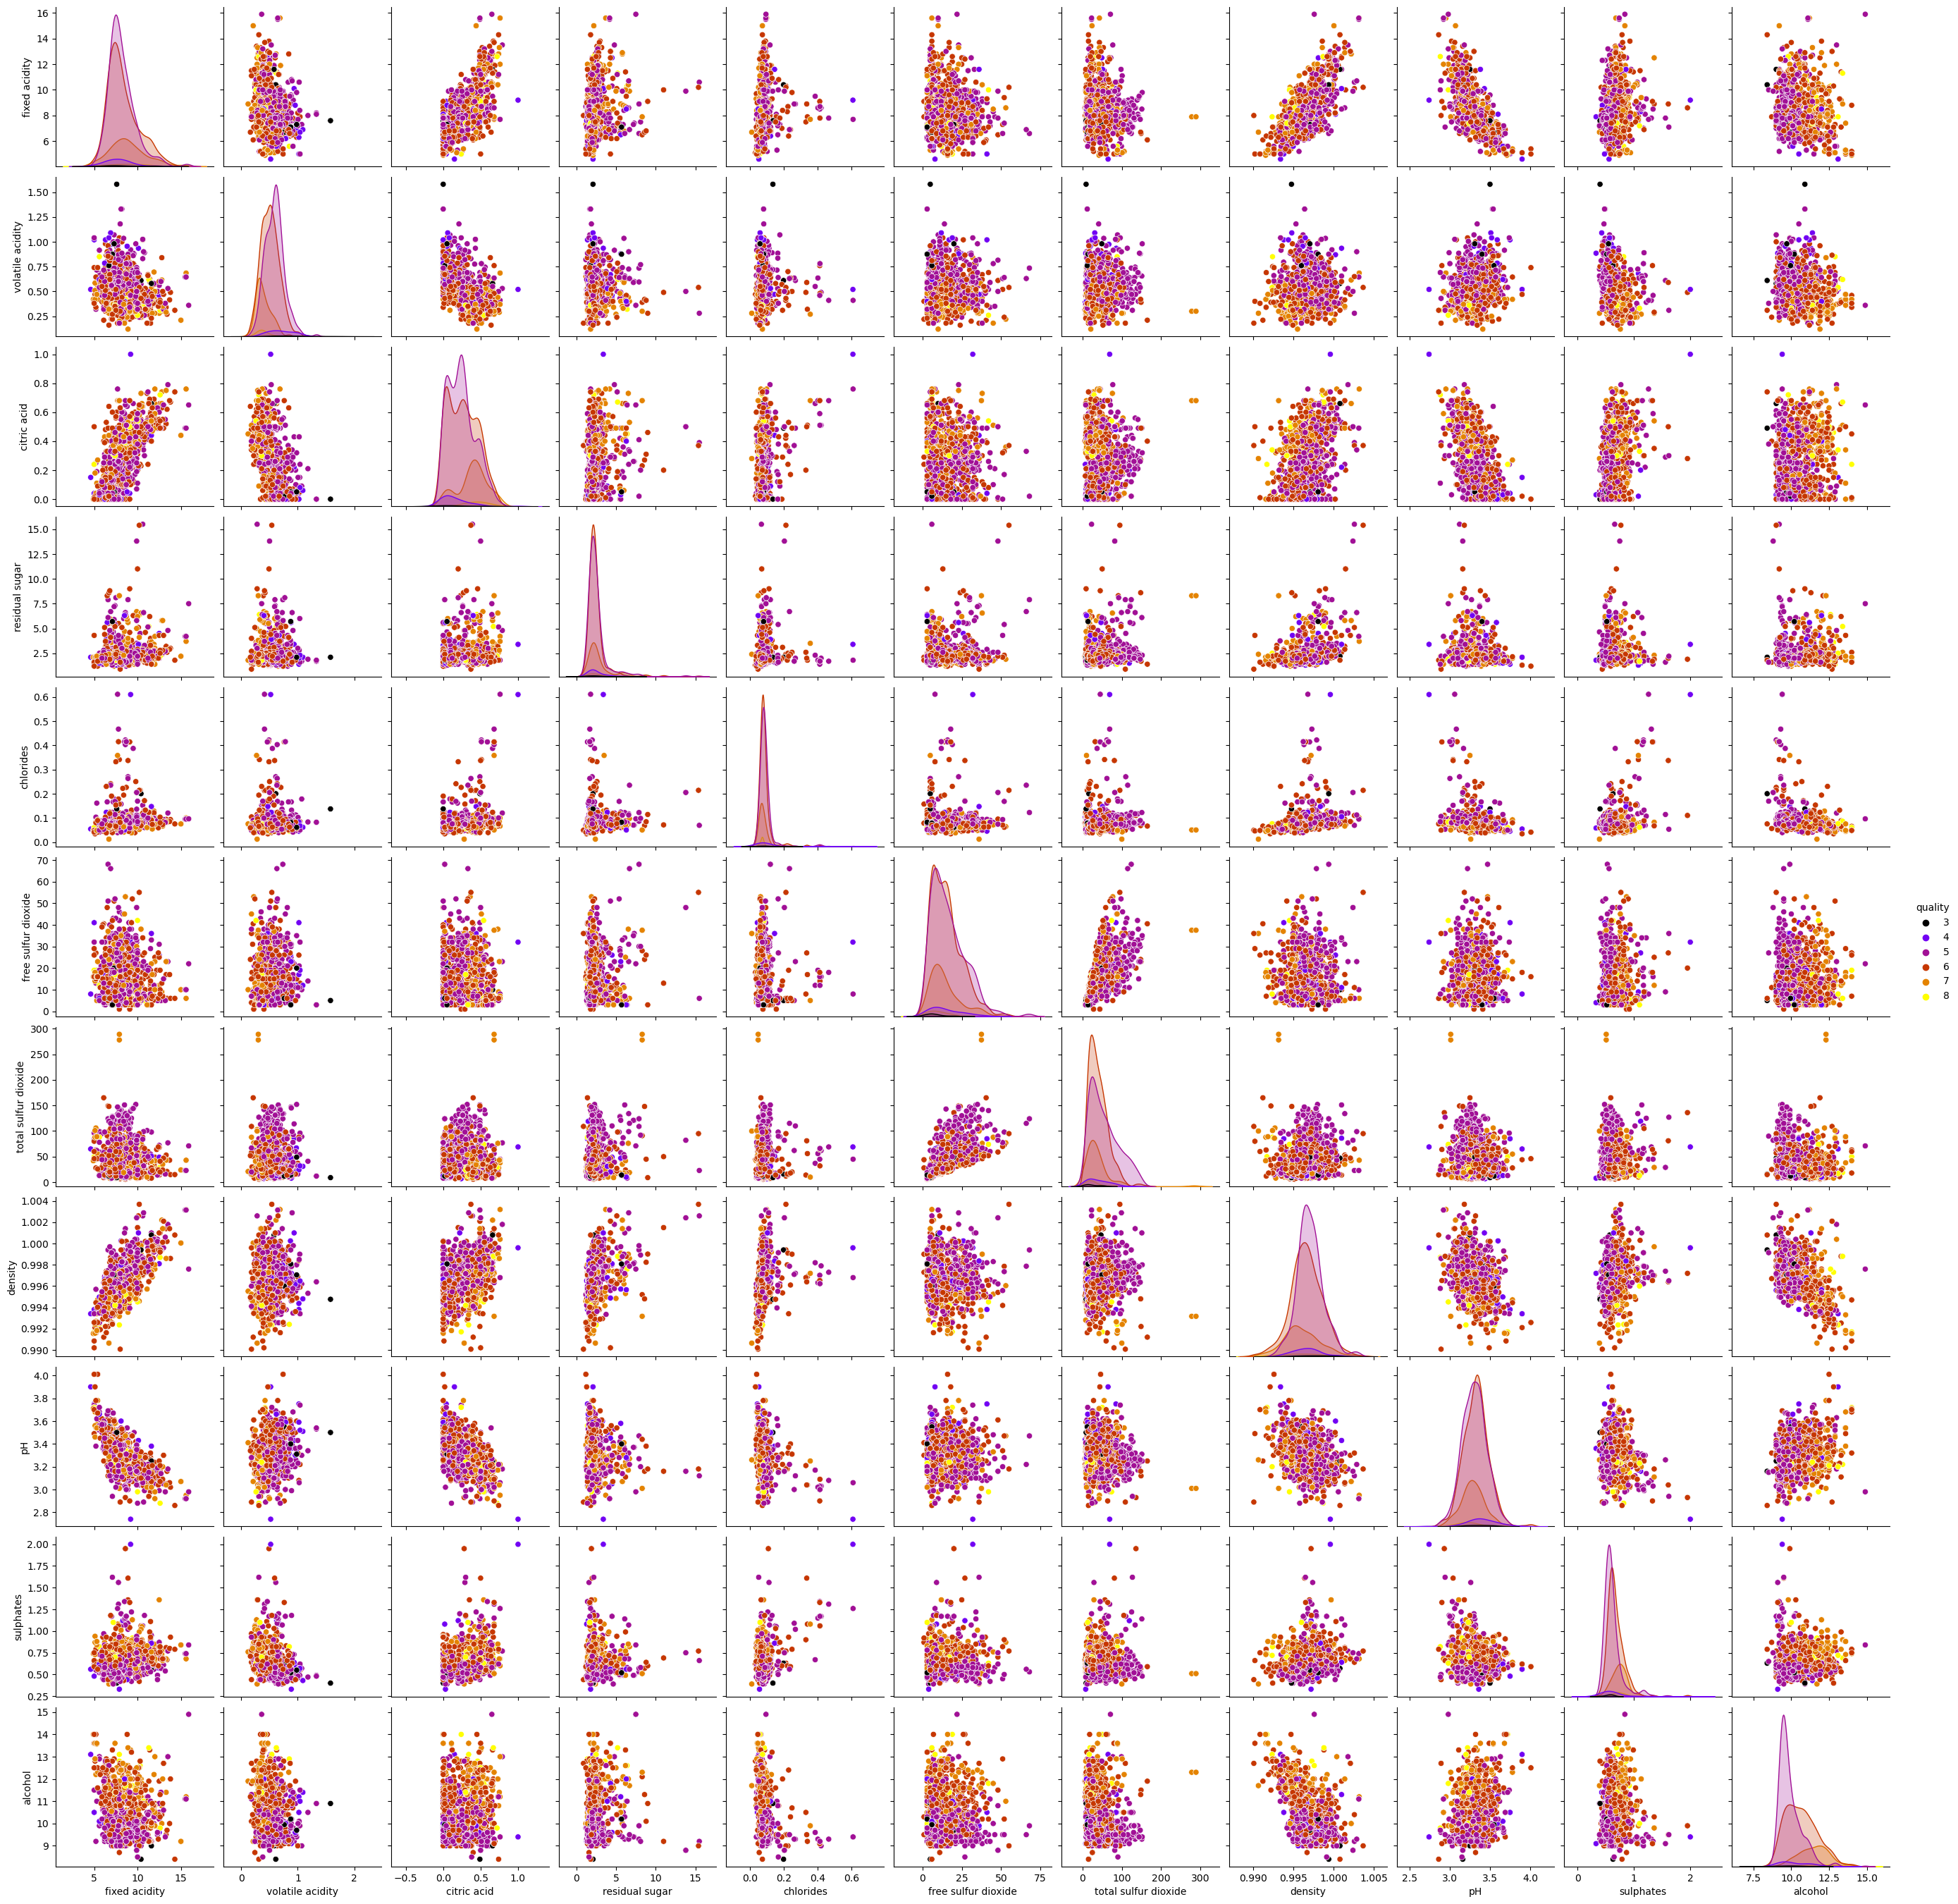

In [32]:
sns.pairplot(data=df.drop("Id",axis=1),hue='quality',palette="gnuplot")

<Axes: >

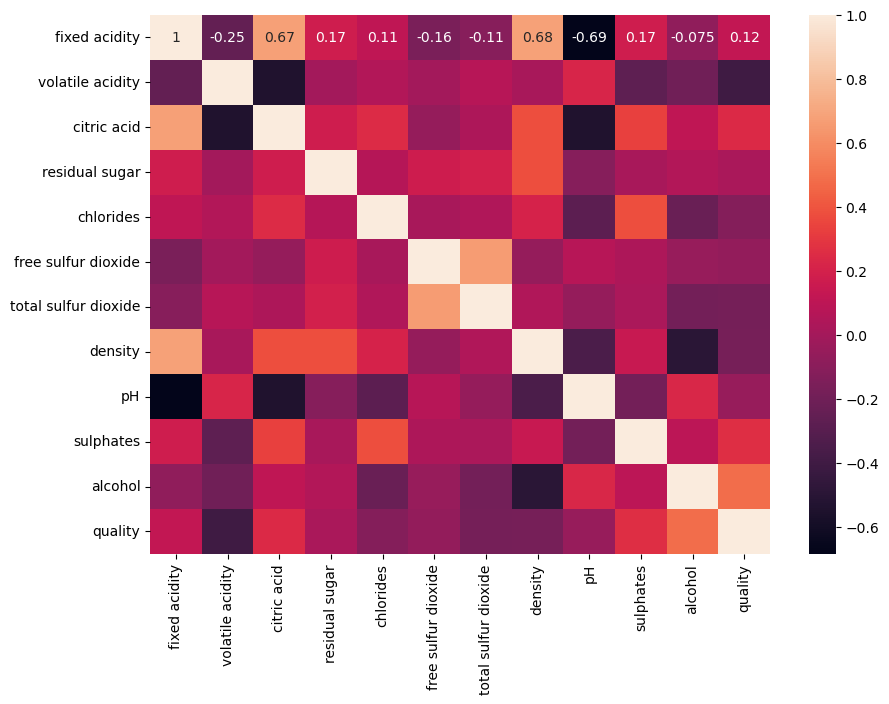

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(['Id'],axis=1).corr(),annot=True)

In [8]:
X=df.iloc[:,0:11].values
y=df.loc[:,"quality"].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=52,test_size=0.2)

### Model Training and Evaluation(SVM)

In [11]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [42]:
y_pred=classifier.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.611353711790393

### Model Training and Evaluation(Random Forest)

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
y_pred=clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6681222707423581

In [20]:
scores=[]
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf,X,y,cv=5)
scores.append(score)

In [21]:
scores

[array([0.54585153, 0.6069869 , 0.61572052, 0.61403509, 0.57017544])]

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  4,  1,  0,  0],
       [ 0,  0, 75, 22,  2,  0],
       [ 0,  0, 22, 63,  4,  0],
       [ 0,  0,  3, 12, 15,  1],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)